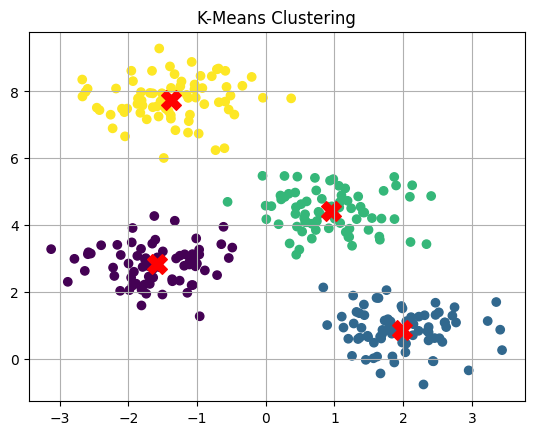

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self, k=2, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)
        indices = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[indices]

        for i in range(self.max_iters):
            # Assign clusters
            self.labels = self._assign_clusters(X)

            # Calculate new centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            # Check for convergence
            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._assign_clusters(X)

# Generate sample data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Apply KMeans
kmeans = KMeansClustering(k=4)
kmeans.fit(X)
labels = kmeans.predict(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.grid(True)
plt.show()
